In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
%matplotlib inline
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA

In [2]:
import pandas as pd

df = pd.read_excel('C:/Users/leewa/Desktop//교육자료/분산분석데이터.xlsx')

In [3]:
model = ols('KS~C(Blendingdyename1)+C(Doseofdye1)+C(Blendingdyename2)+C(Doseofdye2)+C(Doseofdye3)+C(Dyerateofrise1)+C(Dyerateofrise2)+C(Dyerateofrise3)+C(Risingtemperature3)+C(Risetemperatureholdingtime3)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Blendingdyename1),12.0,0.625142,0.052095,0.172866,9.991947e-01
C(Doseofdye1),16.0,7.076156,0.442260,1.467542,1.169072e-01
C(Blendingdyename2),1.0,0.254656,0.254656,0.845021,3.592671e-01
C(Doseofdye2),10.0,0.315239,0.031524,0.104605,9.997682e-01
C(Doseofdye3),7.0,0.096184,0.013741,0.045595,9.998709e-01
C(Dyerateofrise1),1.0,1.113796,1.113796,3.695888,5.621866e-02
C(Dyerateofrise2),2.0,3.697011,1.848505,6.133859,2.678114e-03
C(Dyerateofrise3),7.0,28.738349,4.105478,13.623128,6.271815e-14
C(Risingtemperature3),3.0,6.371229,2.123743,7.047175,1.709978e-04
C(Risetemperatureholdingtime3),7.0,0.695240,0.099320,0.329571,9.396886e-01


In [4]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(df['KS'], df['Doseofdye2'])
result = comp.allpairtest(stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
0.017,0.033,1.722,0.086,1.0,False
0.017,0.067,1.9395,0.0538,1.0,False
0.017,0.167,2.094,0.0374,1.0,False
0.017,0.333,2.6544,0.0084,0.5541,False
0.017,0.667,2.6692,0.008,0.5254,False
0.017,1.0,0.207,0.8362,1.0,False
0.017,1.333,0.5994,0.5494,1.0,False
0.017,2.0,-1.395,0.1639,1.0,False
0.017,2.667,-0.588,0.5573,1.0,False
0.017,4.0,0.8581,0.3917,1.0,False


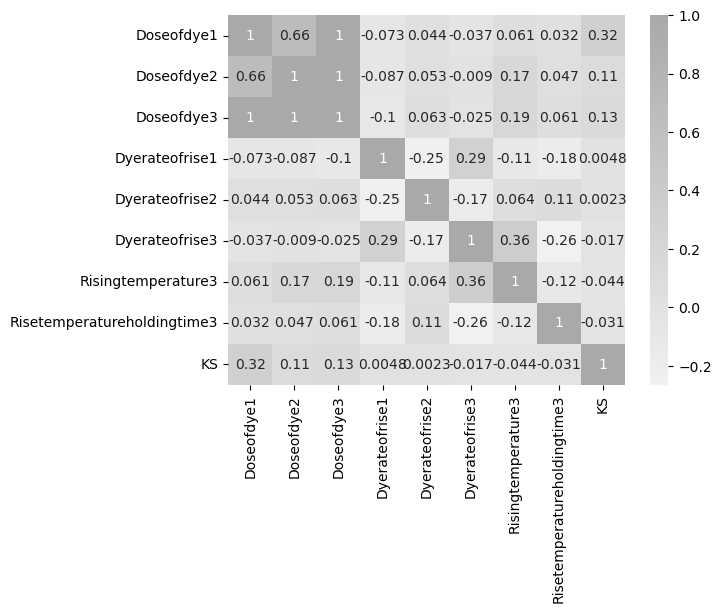

In [22]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

In [5]:
colmap = plt.cm.gist_heat
plt.figure(figsize=(22,22))
df.corr()

,Doseofdye1,Doseofdye2,Doseofdye3,Dyerateofrise1,Dyerateofrise2,Dyerateofrise3,Risingtemperature3,Risetemperatureholdingtime3,KS
Doseofdye1,1.000000,0.664861,1.000000,-0.072625,0.043778,-0.037314,0.061381,0.031546,0.316386
Doseofdye2,0.664861,1.000000,1.000000,-0.086632,0.052632,-0.008983,0.171216,0.046985,0.114265
Doseofdye3,1.000000,1.000000,1.000000,-0.103716,0.062983,-0.025331,0.187888,0.060757,0.127809
Dyerateofrise1,-0.072625,-0.086632,-0.103716,1.000000,-0.250760,0.286757,-0.106266,-0.182243,0.004759
Dyerateofrise2,0.043778,0.052632,0.062983,-0.250760,1.000000,-0.172857,0.064057,0.109856,0.002349
Dyerateofrise3,-0.037314,-0.008983,-0.025331,0.286757,-0.172857,1.000000,0.355058,-0.264928,-0.016827
Risingtemperature3,0.061381,0.171216,0.187888,-0.106266,0.064057,0.355058,1.000000,-0.115263,-0.043559
Risetemperatureholdingtime3,0.031546,0.046985,0.060757,-0.182243,0.109856,-0.264928,-0.115263,1.000000,-0.031060
KS,0.316386,0.114265,0.127809,0.004759,0.002349,-0.016827,-0.043559,-0.031060,1.000000


<Figure size 2200x2200 with 0 Axes>

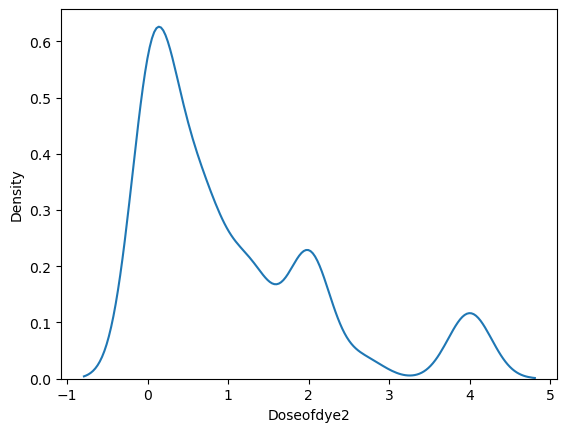

In [23]:
sns.kdeplot(df.Doseofdye2)
plt.show()